# Day 12:  Data Processing

In [ ]:
import pandas as pd
import numpy as np
from numpy import linalg
import sklearn as sk
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors  import KNeighborsRegressor
from math import sqrt

In [ ]:
#This is your first pip!
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


# Numeric Data

## Standardizing

One must first do things manually to understand the machine. These processes are easy to run manually, anyway. Functionalization here is a matter of good code, not because the process is too complex to remember.

In [ ]:
mu = df['longitude'].mean()
sd = df['longitude'].std()

df['standardized_long'] =  (df['longitude'] - mu)/sd

df[['longitude','standardized_long']]

,longitude,standardized_long
0,-122.05,-1.233523
1,-118.30,0.646236
2,-117.81,0.891858
3,-118.36,0.616160
4,-119.67,-0.040503
...,...,...
2995,-119.86,-0.135744
2996,-118.14,0.726439
2997,-119.70,-0.055541
2998,-117.12,1.237734


## Normalizing

In [ ]:
minL = df['longitude'].min()
maxL = df['longitude'].max()

df['normalized_long'] = ( df['longitude'] - minL ) / ( maxL-minL )

df[['longitude','normalized_long', 'standardized_long']]

,longitude,normalized_long,standardized_long
0,-122.05,0.219814,-1.233523
1,-118.30,0.606811,0.646236
2,-117.81,0.657379,0.891858
3,-118.36,0.600619,0.616160
4,-119.67,0.465428,-0.040503
...,...,...,...
2995,-119.86,0.445820,-0.135744
2996,-118.14,0.623323,0.726439
2997,-119.70,0.462332,-0.055541
2998,-117.12,0.728586,1.237734


# Categorical Variables

Some variables are not numeric, see below.  One might want to encode these in a functional way.

In [ ]:
import seaborn as sns

# loads the iris dataset
iris = sns.load_dataset("iris")

iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
#Why did I leave out the last one?  Note true converts to 1, false converts to 0.
iris['setosa'] = iris['species'] == 'setosa'
iris['versicolor'] = iris['species'] == 'versicolor'

iris[['species', 'setosa','versicolor']]

,species,setosa,versicolor
0,setosa,True,False
1,setosa,True,False
2,setosa,True,False
3,setosa,True,False
4,setosa,True,False
...,...,...,...
145,virginica,False,False
146,virginica,False,False
147,virginica,False,False
148,virginica,False,False


In [ ]:
labelInstance = LabelEncoder()
iris['species_encoded'] = labelInstance().fit_transform(iris['species'])
print(iris)

NameError: ignored

# Dimentionality Reduction

One might recall multicolinearity as a major problem - one that becomes more common as data sets become wider, since it is more likely that a column contains extensive matching.   Length of data set (as opposed to width) is sometimes pitched as a way to reduce multicolinearity but this only reduces **incidental** multicolinearity, where two random variables *just so happen to be the same*. In practice, multicolinearity will most often arise from two variables actually being functionally redundant, for example the number of books sold by an author and the number of pages sold by that author.


One way to avoid multicolinarity is by reducing the number of columns -dimensionality reduction provides some guidence as to how to do it. The basic process is based off of the correlation between columns, columns that are tightly related have high correlations (and therefore would have high R^2 if we conduct a VIF test).

In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,standardized_long,normalized_long
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662,1.000000,1.000000
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428,-0.925017,-0.925017
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409,-0.064203,-0.064203
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427,0.049865,0.049865
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279,0.070869,0.070869
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192,0.111572,0.111572
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176,0.051062,0.051062
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695,-0.018701,-0.018701
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000,-0.050662,-0.050662
standardized_long,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662,1.000000,1.000000


In [ ]:
#Let's focus on the problematic areas
df.corr()[['longitude','normalized_long', 'standardized_long']]

,longitude,normalized_long,standardized_long
longitude,1.000000,1.000000,1.000000
latitude,-0.925017,-0.925017,-0.925017
housing_median_age,-0.064203,-0.064203,-0.064203
total_rooms,0.049865,0.049865,0.049865
total_bedrooms,0.070869,0.070869,0.070869
population,0.111572,0.111572,0.111572
households,0.051062,0.051062,0.051062
median_income,-0.018701,-0.018701,-0.018701
median_house_value,-0.050662,-0.050662,-0.050662
standardized_long,1.000000,1.000000,1.000000


In [ ]:
#Let's focus on the problematic areas, note the double-subsetting is challenging. iloc starts index at 0.
df.corr()[['longitude', 'latitude','normalized_long', 'standardized_long']].iloc[[0,1,10,9],:]

,longitude,latitude,normalized_long,standardized_long
longitude,1.000000,-0.925017,1.000000,1.000000
latitude,-0.925017,1.000000,-0.925017,-0.925017
normalized_long,1.000000,-0.925017,1.000000,1.000000
standardized_long,1.000000,-0.925017,1.000000,1.000000


Now these are the problematic ones. The longitude and its normalized variants are almost perfectly correlated. Only one should be selected for further use, the selection should be done based on ease of interpretation and suitability to purpose (before viewing final results).

Amusingly, longitude and latitude are also almost perfectly correlated since the state of CA is a diagonal downward slash. It is certainly possible to cut latitude on the basis of being too correlated with longitude (-0.92), but this decision is almost certianly a case of being too judicious - there is some value to the latitude beyond the longitude.

# Data Partitions

Frequently, one wants to prepare a model for deployment in the real world. However, given a data set DF, it is not clear how to prepare it for some real data that has never arrived - the real world data is always in the future, outside of the computer.

Data partitions help represent this so that we can confirm that our plans work on "new data" that we have left out of our training process.

**Training data** is the one we do our initial work on.
**Validation data** is kept seperate to confirm our model from the training data functions.
**Test data** is another (optional) subset to confirm that our training & validation steps have worked.

We then test it on **new data** from the real world.

In [ ]:
train, test = train_test_split(df, test_size = 0.3) #splits data 70/30 at random.

In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,standardized_long,normalized_long
2446,-118.32,34.01,50.0,1842.0,377.0,817.0,341.0,3.1548,157700.0,0.636211,0.604747
978,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,212200.0,-0.972863,0.273478
2111,-117.89,33.76,34.0,1050.0,210.0,723.0,201.0,4.8000,192700.0,0.851757,0.649123
2041,-122.41,37.80,52.0,812.0,252.0,629.0,247.0,2.5875,500001.0,-1.413980,0.182663
1173,-118.21,33.97,49.0,1409.0,313.0,1268.0,317.0,3.9408,170600.0,0.691350,0.616099


In [ ]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,standardized_long,normalized_long
2973,-122.73,38.46,14.0,4042.0,1298.0,2323.0,1158.0,2.0651,135400.0,-1.574386,0.149639
76,-121.89,37.35,47.0,2879.0,631.0,2229.0,606.0,3.2599,183100.0,-1.153320,0.236326
2338,-118.29,34.09,35.0,2198.0,998.0,3441.0,912.0,2.0467,158300.0,0.651249,0.607843
1247,-117.29,33.19,18.0,6235.0,1233.0,4127.0,1162.0,3.0704,151600.0,1.152518,0.711042
1994,-118.10,33.98,33.0,1927.0,482.0,1623.0,479.0,3.5268,152000.0,0.746490,0.627451


# Learning Types

There are two types of learning problems.
The first type is **supervised learning**, where the data is already labeled. We are attempting to classify or predict new incoming information. For example, when you are asked to do CAPCHA problems and label stop signs for Google, this is helping them build a dataset for supervised learning.   They hope to, eventually, build a machine that can pick out stop signs (or bikes, crosswalks, etc.) from the dataset we have helped them build.

The other type is **unsupervised learning**.  In these cases the data does not have a label. In these cases we are hoping to discover patterns or lables that may not exist - ex: sorting customers into different brackets, finding related songs based on their notes, identifying parts of an object in an image.

# Supervised Learning

This is when the data is **already labeled** - you are typically attempting to classify or predict outcomes.   In the dataset below, one might be interested in identifying if there is a recession or not based on listed factors.

In [ ]:
df_eco = pd.read_csv('economic.csv')
df_eco.head()

,wage_growth,inflation,unemployment,economy,education,gdp
0,7.30,4.49,3.56,no_recession,college,6.27
1,9.05,9.59,2.42,no_recession,college,9.44
2,10.08,11.36,1.23,no_recession,post_graduate,18.29
3,10.98,9.55,1.18,no_recession,post_graduate,19.96
4,8.54,8.63,2.54,no_recession,high_school,8.43


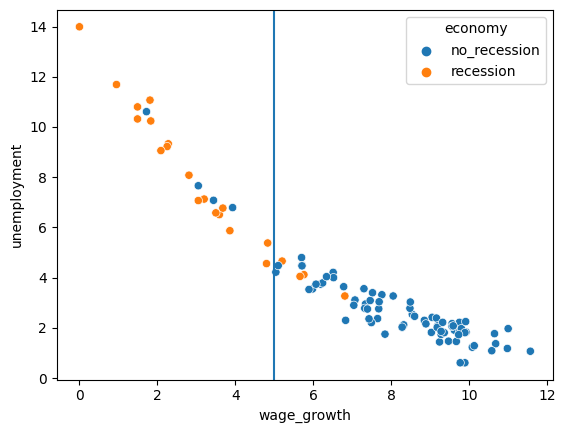

In [ ]:
#There appears to be a break where on the right hand side you are all in a recession, on the lhs you are all not in a recession.
sns.scatterplot(data = df_eco, x = 'wage_growth', y = 'unemployment', hue = 'economy')
plt.axvline(x=5)

Broadly, on the RHS, you are not in a recession and on the LHS you are. So low wage growth is associated with recession and unemployment is associated with recession. Broadly, we'd expect any good classifier to be able to bin our results in this way.

Why is that? Because if everything nearby a point is blue, it's probably blue. Even that recession point around (7,4) if blind, we should probably be guessing as nonrecession.

Using this intuition, One might want to make a classifier based on the **N nearest points*, this is the kNN classifier.

In [ ]:
x_data = df_eco[['unemployment','wage_growth']]
y_data = LabelEncoder().fit_transform(df_eco['economy'] )  #cannot label strings. this makes it binary!
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10)
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# A function to plot the decision boundary.  Not expected to replicate.
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points.
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN Classification (k = %i)" % clf.n_neighbors)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


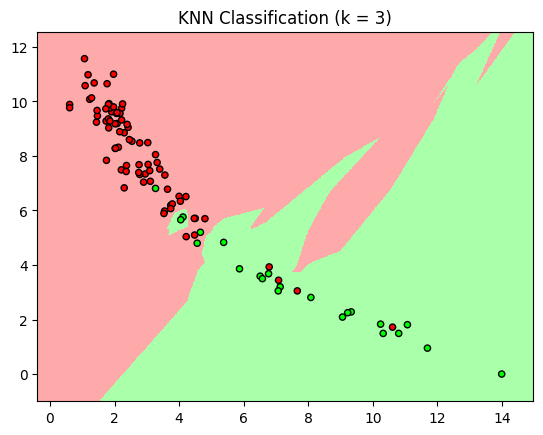

In [ ]:
#Let's see which areas have 3 nearby nonrecession points.
plot_decision_boundary(knn_model, np.array(x_data), np.array(y_data))

Notice the large divot of recession dipping in at about (7,4) - and this hole at (4,6)... this is called overfitting.   A typical solution is to have larger test sets.

Other thoughts: *curse of dimensionality*

# Evaluating Fit



In [ ]:
train_preds = knn_model.predict(x_test)
train_preds

array([0.        , 0.        , 0.66666667, 0.66666667, 1.        ,
       1.        , 0.        , 0.33333333, 0.        , 0.        ])

Anything predicted to be over half recession is a recession.

In [ ]:
train_preds = np.round(train_preds)
train_preds

array([0., 0., 1., 1., 1., 1., 0., 0., 0., 0.])

In [ ]:
accuracy = accuracy_score(y_test, train_preds)
precision = precision_score(y_test, train_preds)
recall = recall_score(y_test, train_preds)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7
Precision: 0.75
Recall: 0.6


Overall Error Rate = % of mis-classified observations (any direction).

Accuracy = 1 - Overall Error Rate.

Precision is the proportion of positives out of the body of positives:
$Precision = \frac{True Positives}{True Positives + False Positives}$

Sensitivity/Recall is ability to correctly identify positives.   

$Sensitivity/Recall = \frac{True Positives}{True Positives + False Negatives} = \frac{True Positives}{All Positive Results} $

Specificity is the ability to correctly identify negatives.

$Specificity = \frac{True Negatives}{False Positives + True Negatives} = \frac{True Negatives}{All Negative Results}$

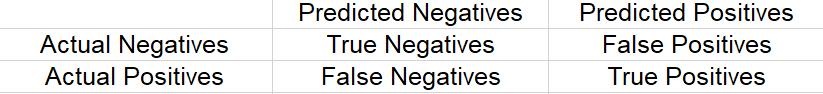

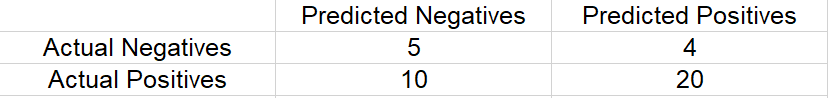

Example:

Sensitivity/recall =  20/(10+20)


Specificity = 5/(5+4)

Overall Error Rate = (4+10)/(5+20+10+4)

Accuracy = (5+20)/(5+20+10+4)

# Logistic Regression

$\frac{e^{\beta_0 + \beta_1 x_1 + \dots}}{1+e^{\beta_0 + \beta_1 x_1 + \dots}}$ is the general shape of the logistic function.


Let's plot it for a simple case.

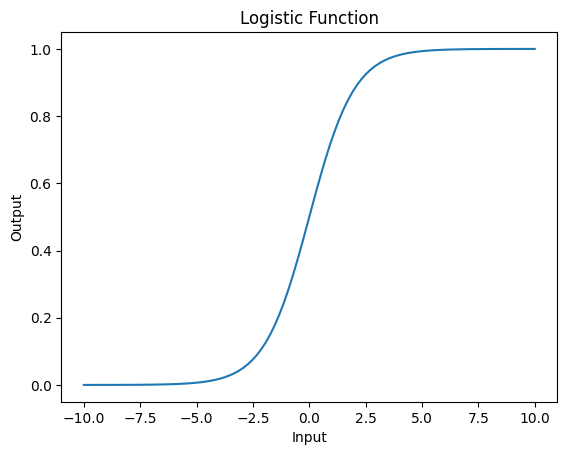

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.title("Logistic Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

There are many functions that have this shape, for example the probability you win a game (y) with hours trained (x).

We can flip and compress this function as needed.

In [ ]:
df_fg = pd.read_csv('2012-fg-attempts.csv')
df_fg.head()

,Outcome,Distance,Quarter,Team,ScoreDiffPreKick
0,0,48,2,OAK,-7
1,0,48,2,SF,7
2,0,50,2,ARI,0
3,0,40,3,WAS,-26
4,0,51,2,HOU,-7


In [ ]:
df_fg['encodedTeam'] = LabelEncoder().fit_transform(df_fg['Team'])

In [ ]:
x_goals = df_fg[['Distance','Quarter']]
y_goals = df_fg['Outcome']

In [ ]:
logReg = LogisticRegression()
logReg.fit(x_goals, y_goals)
df_fg['goals_pred'] = logReg.predict(x_goals)

<Axes: xlabel='Distance', ylabel='Outcome'>

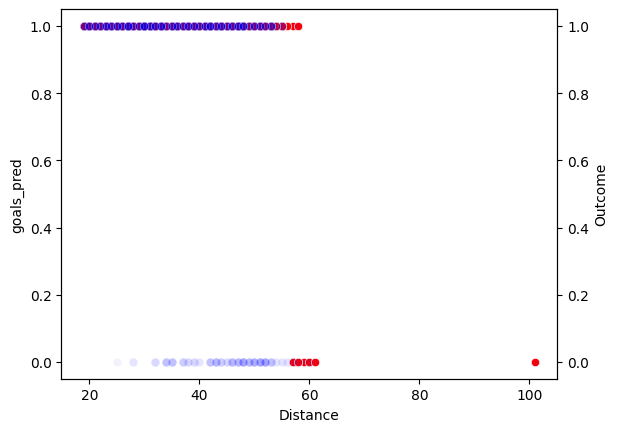

In [ ]:
#Let's overlay the two figures with real (blue) and simulated (red) results
fig, ax1 = plt.subplots()
sns.scatterplot(y = 'goals_pred', x = 'Distance', data = df_fg, color = 'red')
ax2 = ax1.twinx()
sns.scatterplot(y = 'Outcome', x = 'Distance', data = df_fg, color = 'blue', alpha = 0.05)

# Exercizes

1) Repeat the KNN fit with a larger test set, see if the overfitting point at 6,4 improves.

2) The economics data contains 'education levels'. It isn't well explained in the documentation what this column is for, likely this recession data is stratified by education level and perhaps year or state. Plot the various types of education levels on a figure. Repeat the KNN fit, except instead of predicting recession, predict "education" level.  You do not have to show the decision boundary, but add the predicted fits to the orginal data frame show the result.